In [58]:
import numpy as np
from matplotlib import pyplot as plt


data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)


def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/dim)*s
    
    return w

def recall(pattern,w):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        
        if check_True(pattern):
            print (count,"iterations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
  
        elif np.array_equal(pattern,previousPattern):
            print("Local minimum in iteration:",count)
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            break
            
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern):
    solved = False
    for i in range(patterns.shape[0]):
        if np.array_equal(patterns[i],predicted_pattern):
            #print("True! It matched pattern nr:",i)
            solved = True
    return solved

def flip(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    #plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    #plt.show()
    
    return flipped

In [59]:
#Investigate capacity

patterns = data[:9,:]
correctList = []

In [60]:
w = new_init_weights(patterns)

1 number of patterns
1 patterns remained stable

2 number of patterns
2 patterns remained stable

3 number of patterns
3 patterns remained stable

4 number of patterns
Not stable

5 number of patterns
Not stable

6 number of patterns
Not stable

7 number of patterns
Not stable

8 number of patterns
Not stable

9 number of patterns
Not stable



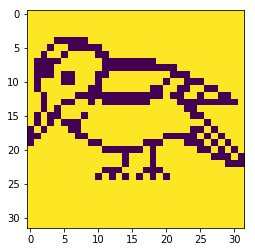

In [61]:
plt.imshow(patterns[5].reshape(32,32),interpolation="nearest")
plt.show()

In [62]:
# randomn patterns

random_patterns = []
nrOfVectors=150
for i in range(nrOfVectors):
    random_patterns.append(genRandVector(1024))
random_patterns = np.array(random_patterns)

correctList = [] #Global variable

In [63]:
w_rand = new_init_weights(random_patterns)

1 number of patterns
1 patterns remained stable

2 number of patterns
2 patterns remained stable

3 number of patterns
3 patterns remained stable

4 number of patterns
4 patterns remained stable

5 number of patterns
5 patterns remained stable

6 number of patterns
6 patterns remained stable

7 number of patterns
7 patterns remained stable

8 number of patterns
8 patterns remained stable

9 number of patterns
9 patterns remained stable

10 number of patterns
10 patterns remained stable

11 number of patterns
11 patterns remained stable

12 number of patterns
12 patterns remained stable

13 number of patterns
13 patterns remained stable

14 number of patterns
14 patterns remained stable

15 number of patterns
15 patterns remained stable

16 number of patterns
16 patterns remained stable

17 number of patterns
17 patterns remained stable

18 number of patterns
18 patterns remained stable

19 number of patterns
19 patterns remained stable

20 number of patterns
20 patterns remained stable

In [64]:
#300 random patterns in 100 unit network

def new_init_weights(patterns,zeroDiag=False):
    dim = patterns.shape[1]
    n = patterns.shape[0]
    w=np.zeros((dim,dim))
    
    for i in range(n): 
        w+=1/dim*np.multiply.outer(patterns[i],patterns[i])
        if(zeroDiag):
            np.fill_diagonal(w,0)
        experiment(w,i,patterns)   
    return w

def experiment(w,iterations,patterns,plsReturn=False):
    N = patterns.shape[0] #Nr of patterns 
    outcomeList = []
    
    #Iterate over the amount of patterns that have been inserted to w
    for i in range(iterations+1):
        outcome = checkStable(patterns[i],w)
        outcomeList.append(outcome)

    unique,counts=np.unique(np.array(outcomeList),return_counts=True)
    a = dict(zip(unique, counts))
    print(iterations+1,"number of patterns")
    if True in a:
        print(a[True],"patterns remained stable\n")
        correctList.append(a[True])
    else:
        print("Not stable\n")
        correctList.append(0)
    if(plsReturn):
        return correctList
        
#Checks if pattern changes during one iteration, if not it's stable
def checkStable(pattern,w): 
    s = np.dot(w,pattern)
    s[s >= 0] = 1
    s[s < 0] = -1

    if(np.array_equal(pattern,s)):
        return True
    else:
        return False
        
def genRandVector(dim):
    dim = int(dim/2)
    randVector = np.concatenate([np.ones(dim),-1*np.ones(dim)])
    np.random.shuffle(randVector)
    #print(randVector)
    return randVector


In [73]:
patterns = []
nrOfVectors=300
for i in range(nrOfVectors):
    patterns.append(genRandVector(144)) #Gets a 100 unit vector
patterns = np.array(patterns)

In [74]:
correctList = []
w_1 = new_init_weights(patterns)

1 number of patterns
1 patterns remained stable

2 number of patterns
2 patterns remained stable

3 number of patterns
3 patterns remained stable

4 number of patterns
4 patterns remained stable

5 number of patterns
5 patterns remained stable

6 number of patterns
6 patterns remained stable

7 number of patterns
7 patterns remained stable

8 number of patterns
8 patterns remained stable

9 number of patterns
9 patterns remained stable

10 number of patterns
10 patterns remained stable

11 number of patterns
11 patterns remained stable

12 number of patterns
12 patterns remained stable

13 number of patterns
13 patterns remained stable

14 number of patterns
14 patterns remained stable

15 number of patterns
15 patterns remained stable

16 number of patterns
16 patterns remained stable

17 number of patterns
16 patterns remained stable

18 number of patterns
16 patterns remained stable

19 number of patterns
16 patterns remained stable

20 number of patterns
17 patterns remained stable

171 number of patterns
4 patterns remained stable

172 number of patterns
3 patterns remained stable

173 number of patterns
5 patterns remained stable

174 number of patterns
4 patterns remained stable

175 number of patterns
4 patterns remained stable

176 number of patterns
6 patterns remained stable

177 number of patterns
7 patterns remained stable

178 number of patterns
4 patterns remained stable

179 number of patterns
2 patterns remained stable

180 number of patterns
2 patterns remained stable

181 number of patterns
5 patterns remained stable

182 number of patterns
4 patterns remained stable

183 number of patterns
5 patterns remained stable

184 number of patterns
6 patterns remained stable

185 number of patterns
6 patterns remained stable

186 number of patterns
6 patterns remained stable

187 number of patterns
3 patterns remained stable

188 number of patterns
5 patterns remained stable

189 number of patterns
4 patterns remained stable

190 number of patterns
5 patter

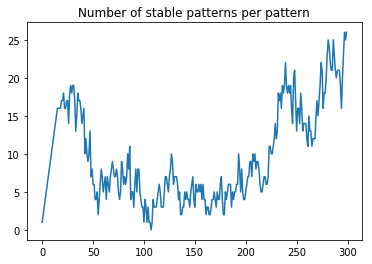

In [75]:
plt.plot(range(len(correctList)),correctList)
plt.title("Number of stable patterns per pattern")
plt.show()

In [80]:
flipped_patterns = []
for pat in patterns:
    flipped_patterns.append(flip(pat,0.7))
flipped_patterns = np.array(flipped_patterns)

correctList = []
w_2 = new_init_weights(flipped_patterns)

1 number of patterns
1 patterns remained stable

2 number of patterns
2 patterns remained stable

3 number of patterns
3 patterns remained stable

4 number of patterns
4 patterns remained stable

5 number of patterns
5 patterns remained stable

6 number of patterns
6 patterns remained stable

7 number of patterns
7 patterns remained stable

8 number of patterns
8 patterns remained stable

9 number of patterns
9 patterns remained stable

10 number of patterns
10 patterns remained stable

11 number of patterns
11 patterns remained stable

12 number of patterns
12 patterns remained stable

13 number of patterns
13 patterns remained stable

14 number of patterns
14 patterns remained stable

15 number of patterns
15 patterns remained stable

16 number of patterns
16 patterns remained stable

17 number of patterns
17 patterns remained stable

18 number of patterns
18 patterns remained stable

19 number of patterns
19 patterns remained stable

20 number of patterns
20 patterns remained stable

168 number of patterns
11 patterns remained stable

169 number of patterns
9 patterns remained stable

170 number of patterns
7 patterns remained stable

171 number of patterns
9 patterns remained stable

172 number of patterns
8 patterns remained stable

173 number of patterns
7 patterns remained stable

174 number of patterns
6 patterns remained stable

175 number of patterns
7 patterns remained stable

176 number of patterns
7 patterns remained stable

177 number of patterns
6 patterns remained stable

178 number of patterns
7 patterns remained stable

179 number of patterns
7 patterns remained stable

180 number of patterns
6 patterns remained stable

181 number of patterns
7 patterns remained stable

182 number of patterns
6 patterns remained stable

183 number of patterns
6 patterns remained stable

184 number of patterns
5 patterns remained stable

185 number of patterns
7 patterns remained stable

186 number of patterns
6 patterns remained stable

187 number of patterns
6 patte

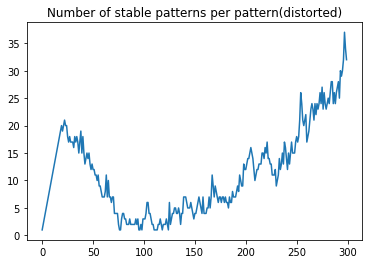

In [81]:
plt.plot(range(len(correctList)),correctList)
plt.title("Number of stable patterns per pattern(distorted)")
plt.show()

In [51]:
##Adding a 0-diagonal t
correctList = []
w_3 = new_init_weights(patterns,zeroDiag=True)

1 number of patterns
1 patterns remained stable

2 number of patterns
2 patterns remained stable

3 number of patterns
3 patterns remained stable

4 number of patterns
4 patterns remained stable

5 number of patterns
5 patterns remained stable

6 number of patterns
6 patterns remained stable

7 number of patterns
7 patterns remained stable

8 number of patterns
8 patterns remained stable

9 number of patterns
9 patterns remained stable

10 number of patterns
10 patterns remained stable

11 number of patterns
11 patterns remained stable

12 number of patterns
12 patterns remained stable

13 number of patterns
13 patterns remained stable

14 number of patterns
13 patterns remained stable

15 number of patterns
14 patterns remained stable

16 number of patterns
12 patterns remained stable

17 number of patterns
14 patterns remained stable

18 number of patterns
13 patterns remained stable

19 number of patterns
12 patterns remained stable

20 number of patterns
13 patterns remained stable

220 number of patterns
Not stable

221 number of patterns
Not stable

222 number of patterns
Not stable

223 number of patterns
Not stable

224 number of patterns
Not stable

225 number of patterns
Not stable

226 number of patterns
Not stable

227 number of patterns
Not stable

228 number of patterns
Not stable

229 number of patterns
Not stable

230 number of patterns
Not stable

231 number of patterns
Not stable

232 number of patterns
Not stable

233 number of patterns
Not stable

234 number of patterns
Not stable

235 number of patterns
Not stable

236 number of patterns
Not stable

237 number of patterns
Not stable

238 number of patterns
Not stable

239 number of patterns
Not stable

240 number of patterns
Not stable

241 number of patterns
Not stable

242 number of patterns
Not stable

243 number of patterns
Not stable

244 number of patterns
Not stable

245 number of patterns
Not stable

246 number of patterns
Not stable

247 number of patterns
Not stable

248 number of patter

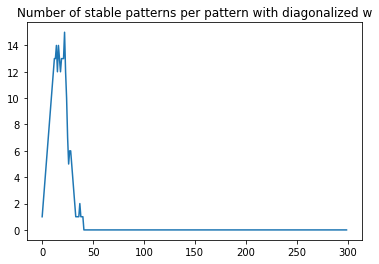

In [52]:
plt.plot(range(len(correctList)),correctList)
plt.title("Number of stable patterns per pattern with diagonalized w")
plt.show()

In [53]:
##...And now also with distortion
correctList = []
w_4 = new_init_weights(flipped_patterns,zeroDiag=True)

1 number of patterns
1 patterns remained stable

2 number of patterns
2 patterns remained stable

3 number of patterns
3 patterns remained stable

4 number of patterns
4 patterns remained stable

5 number of patterns
5 patterns remained stable

6 number of patterns
6 patterns remained stable

7 number of patterns
7 patterns remained stable

8 number of patterns
8 patterns remained stable

9 number of patterns
9 patterns remained stable

10 number of patterns
10 patterns remained stable

11 number of patterns
11 patterns remained stable

12 number of patterns
12 patterns remained stable

13 number of patterns
13 patterns remained stable

14 number of patterns
14 patterns remained stable

15 number of patterns
13 patterns remained stable

16 number of patterns
13 patterns remained stable

17 number of patterns
14 patterns remained stable

18 number of patterns
15 patterns remained stable

19 number of patterns
16 patterns remained stable

20 number of patterns
17 patterns remained stable

224 number of patterns
Not stable

225 number of patterns
Not stable

226 number of patterns
Not stable

227 number of patterns
Not stable

228 number of patterns
Not stable

229 number of patterns
Not stable

230 number of patterns
Not stable

231 number of patterns
Not stable

232 number of patterns
Not stable

233 number of patterns
Not stable

234 number of patterns
Not stable

235 number of patterns
Not stable

236 number of patterns
Not stable

237 number of patterns
Not stable

238 number of patterns
Not stable

239 number of patterns
Not stable

240 number of patterns
Not stable

241 number of patterns
Not stable

242 number of patterns
Not stable

243 number of patterns
Not stable

244 number of patterns
Not stable

245 number of patterns
Not stable

246 number of patterns
Not stable

247 number of patterns
Not stable

248 number of patterns
Not stable

249 number of patterns
Not stable

250 number of patterns
Not stable

251 number of patterns
Not stable

252 number of patter

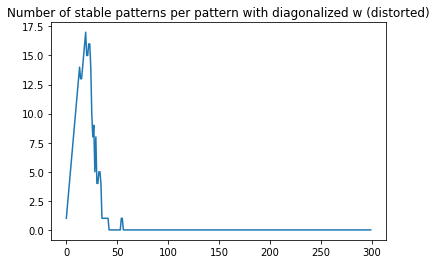

In [54]:
plt.plot(range(len(correctList)),correctList)
plt.title("Number of stable patterns per pattern with diagonalized w (distorted)")
plt.show()

In [55]:
#adding bias to the equation

biased_patterns = np.sign(0.5+np.random.randn(300,144))
correctList = []
w_5 = new_init_weights(biased_patterns)

1 number of patterns
1 patterns remained stable

2 number of patterns
2 patterns remained stable

3 number of patterns
3 patterns remained stable

4 number of patterns
4 patterns remained stable

5 number of patterns
5 patterns remained stable

6 number of patterns
5 patterns remained stable

7 number of patterns
5 patterns remained stable

8 number of patterns
3 patterns remained stable

9 number of patterns
2 patterns remained stable

10 number of patterns
1 patterns remained stable

11 number of patterns
1 patterns remained stable

12 number of patterns
Not stable

13 number of patterns
Not stable

14 number of patterns
Not stable

15 number of patterns
Not stable

16 number of patterns
Not stable

17 number of patterns
Not stable

18 number of patterns
Not stable

19 number of patterns
Not stable

20 number of patterns
Not stable

21 number of patterns
Not stable

22 number of patterns
Not stable

23 number of patterns
Not stable

24 number of patterns
Not stable

25 number of patt

235 number of patterns
Not stable

236 number of patterns
Not stable

237 number of patterns
Not stable

238 number of patterns
Not stable

239 number of patterns
Not stable

240 number of patterns
Not stable

241 number of patterns
Not stable

242 number of patterns
Not stable

243 number of patterns
Not stable

244 number of patterns
Not stable

245 number of patterns
Not stable

246 number of patterns
Not stable

247 number of patterns
Not stable

248 number of patterns
Not stable

249 number of patterns
Not stable

250 number of patterns
Not stable

251 number of patterns
Not stable

252 number of patterns
Not stable

253 number of patterns
Not stable

254 number of patterns
Not stable

255 number of patterns
Not stable

256 number of patterns
Not stable

257 number of patterns
Not stable

258 number of patterns
Not stable

259 number of patterns
Not stable

260 number of patterns
Not stable

261 number of patterns
Not stable

262 number of patterns
Not stable

263 number of patter

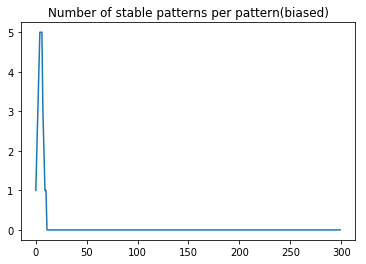

In [57]:
plt.plot(range(len(correctList)),correctList)
plt.title("Number of stable patterns per pattern(biased)")
plt.show()